In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Load Data

In [2]:
#read csv file
data = pd.read_csv('Lung Cancer Dataset.csv')

# Data Preprocessing

In [3]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [4]:
# Display the first few rows of the dataset to understand its structure
data.head(25)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [5]:
#show the row and column of dataset
data.shape

(5000, 18)

In [6]:
#check is any missing value or null value
missing_values = data.isnull().sum()
print(missing_values)

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [7]:
# to print all value in Pulmonary Disease column
print(data['PULMONARY_DISEASE'].unique())

['NO' 'YES']


In [8]:
# Convert 'YES' to 1 and 'NO' to 0 in the 'PULMONARY_DISEASE' column
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Print unique values to confirm the change
print(data['PULMONARY_DISEASE'].unique())

[0 1]


In [9]:
# Drop unnecessary columns
data = data.drop(['SMOKING_FAMILY_HISTORY'], axis=1)

In [10]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    5000 non-null   int64  
 1   GENDER                 5000 non-null   int64  
 2   SMOKING                5000 non-null   int64  
 3   FINGER_DISCOLORATION   5000 non-null   int64  
 4   MENTAL_STRESS          5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION  5000 non-null   int64  
 6   LONG_TERM_ILLNESS      5000 non-null   int64  
 7   ENERGY_LEVEL           5000 non-null   float64
 8   IMMUNE_WEAKNESS        5000 non-null   int64  
 9   BREATHING_ISSUE        5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION    5000 non-null   int64  
 11  THROAT_DISCOMFORT      5000 non-null   int64  
 12  OXYGEN_SATURATION      5000 non-null   float64
 13  CHEST_TIGHTNESS        5000 non-null   int64  
 14  FAMILY_HISTORY         5000 non-null   int64  
 15  STRE

In [11]:
# Fill missing values with the median of the column to avoid unbalance data
data = data.fillna(data.median(numeric_only=True))


In [12]:
# Display with labels
print(data['PULMONARY_DISEASE'].value_counts().rename(index={0: 'No Disease', 1: 'Pulmonary Disease'}))


PULMONARY_DISEASE
No Disease           2963
Pulmonary Disease    2037
Name: count, dtype: int64


In [13]:
#Split data into features and labels
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

In [14]:
#show the row and column of dataset after preprocess
data.shape

(5000, 17)

In [15]:
#split data 80% for training, 20% for testing
# stratify=y ensures that the split is stratified based on the class distribution in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#show record of features in dataset after preprocess
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.0000


c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\sit

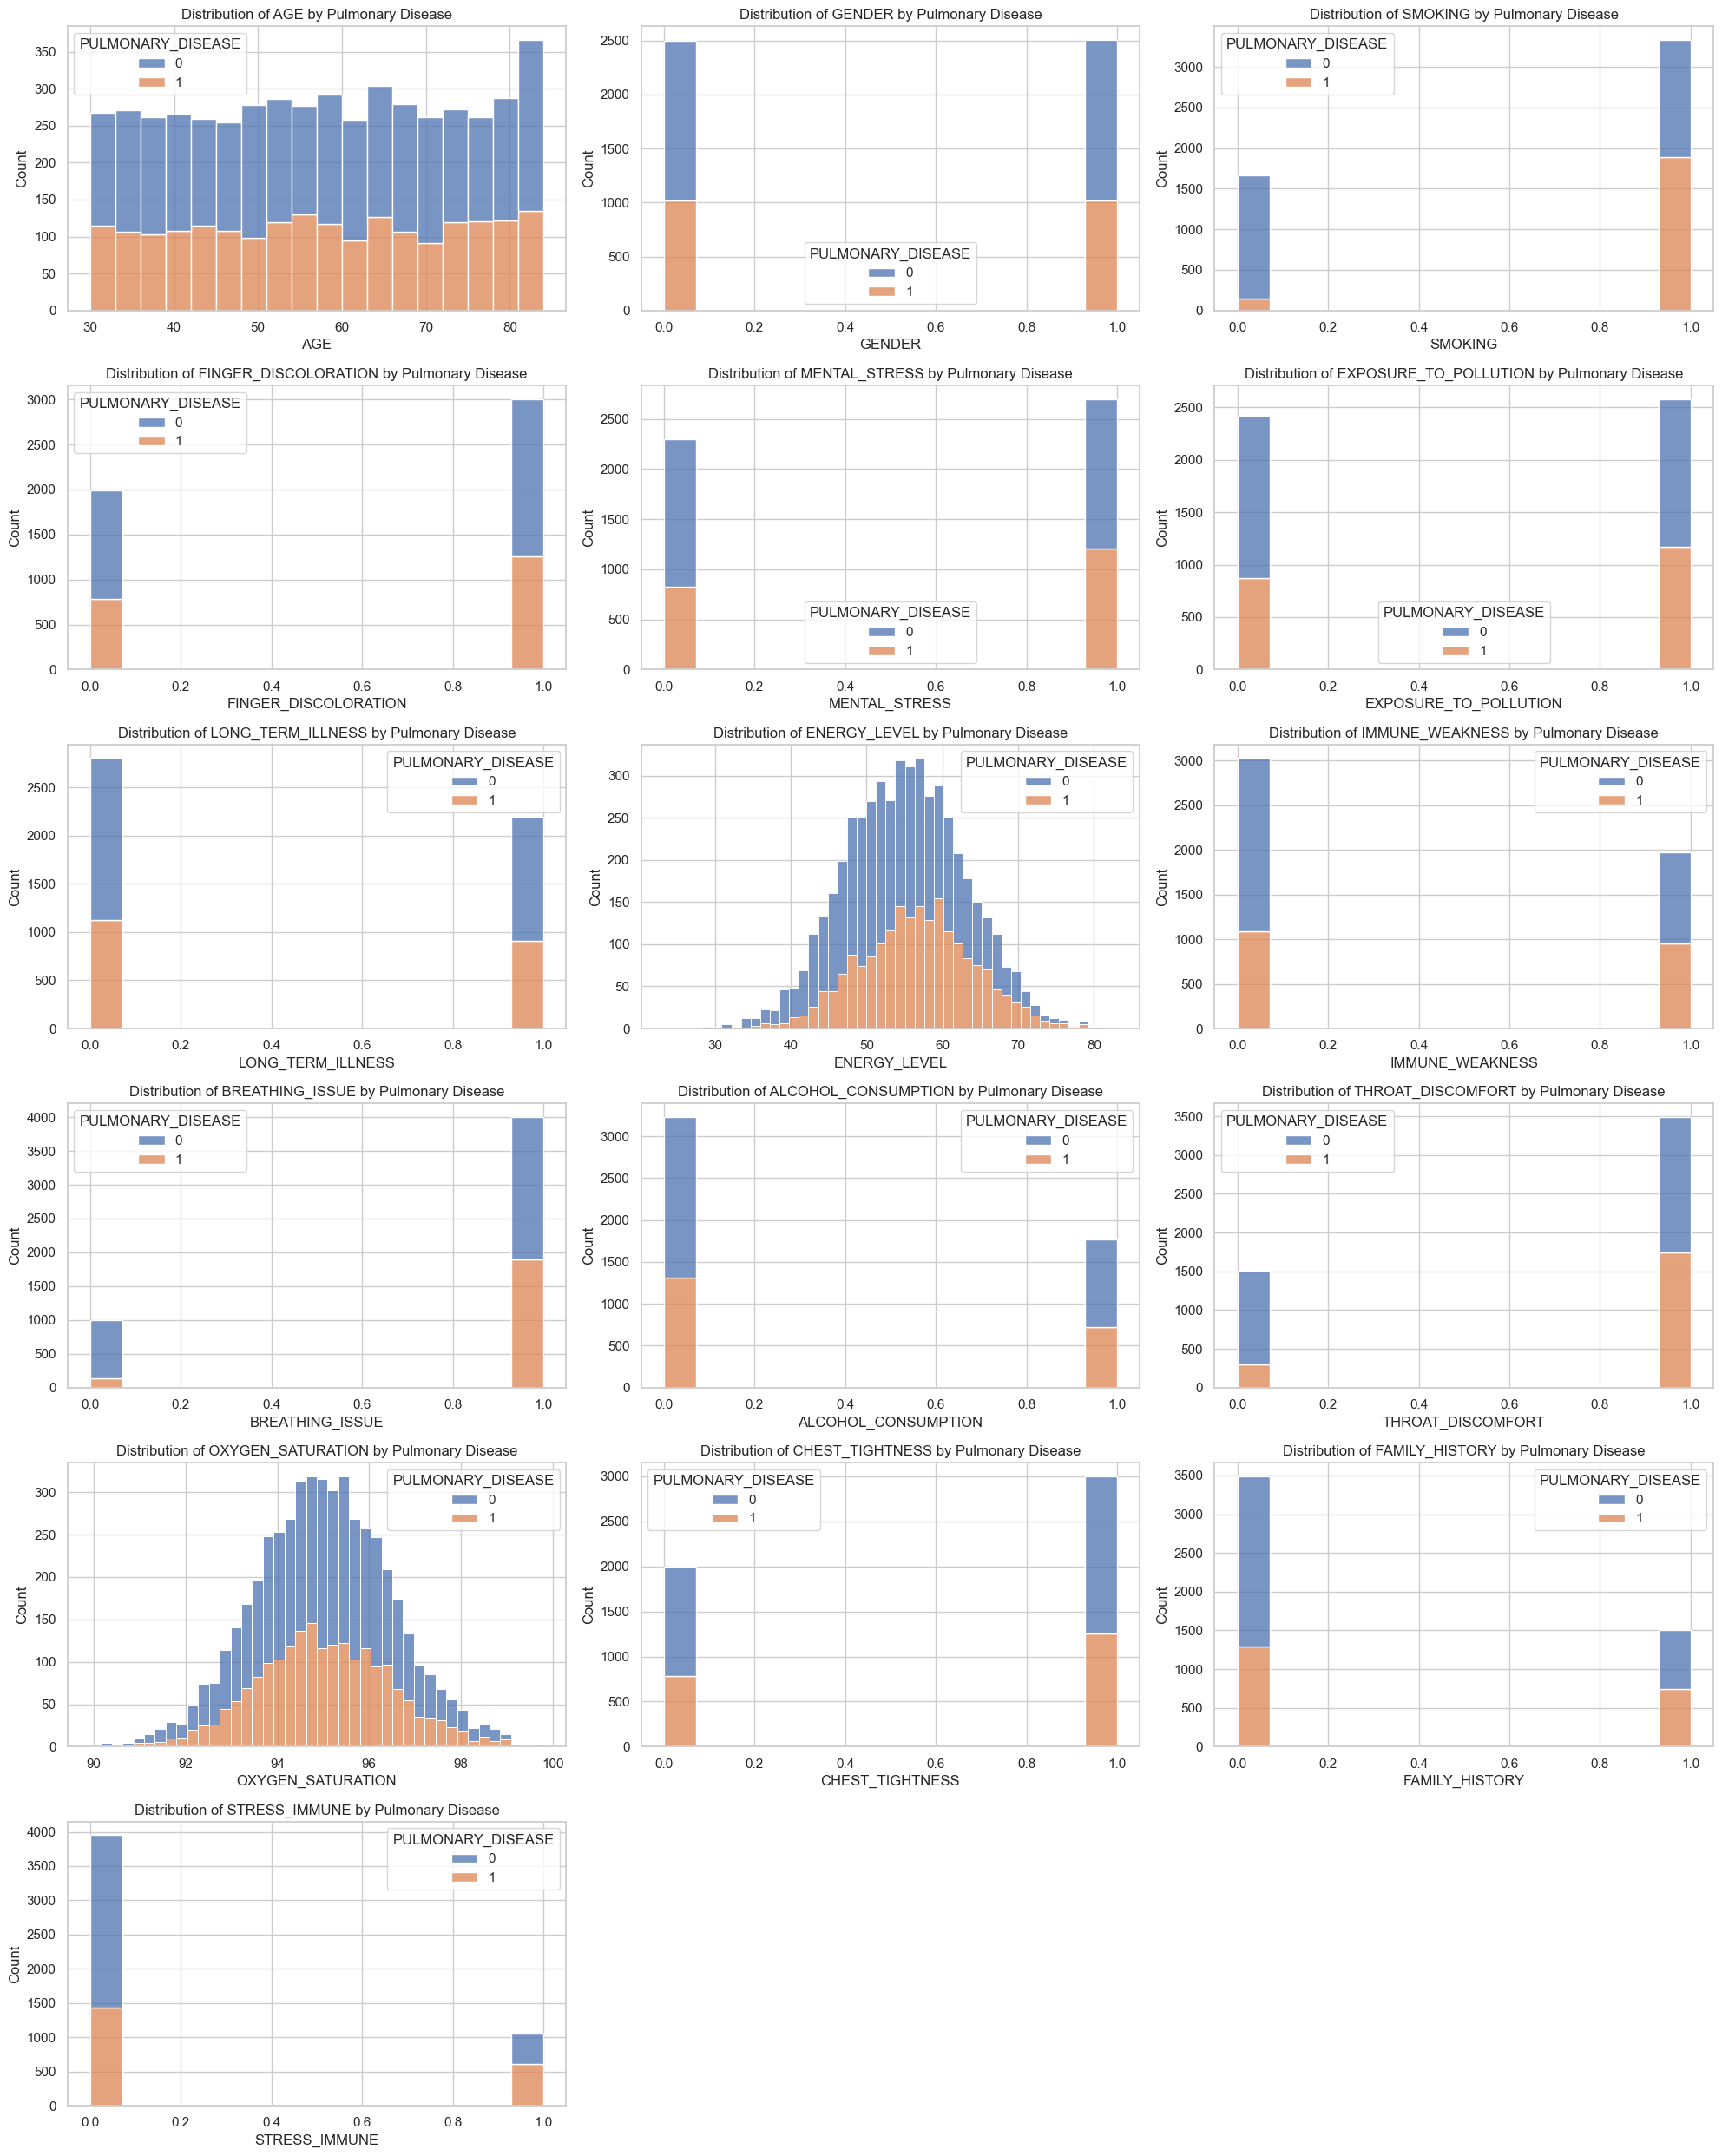

In [18]:
#show the data of features by plotting in graph mode
# Set style
sns.set(style="whitegrid")
data_columns = data.columns[:-1]  # Exclude target column

# Plot histograms for all features
plt.figure(figsize=(20, 25))
for i, col in enumerate(data_columns):
    plt.subplot(6, 3, i + 1)
    sns.histplot(data=data, x=col, hue='PULMONARY_DISEASE', multiple='stack', kde=False)
    plt.title(f"Distribution of {col} by Pulmonary Disease")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

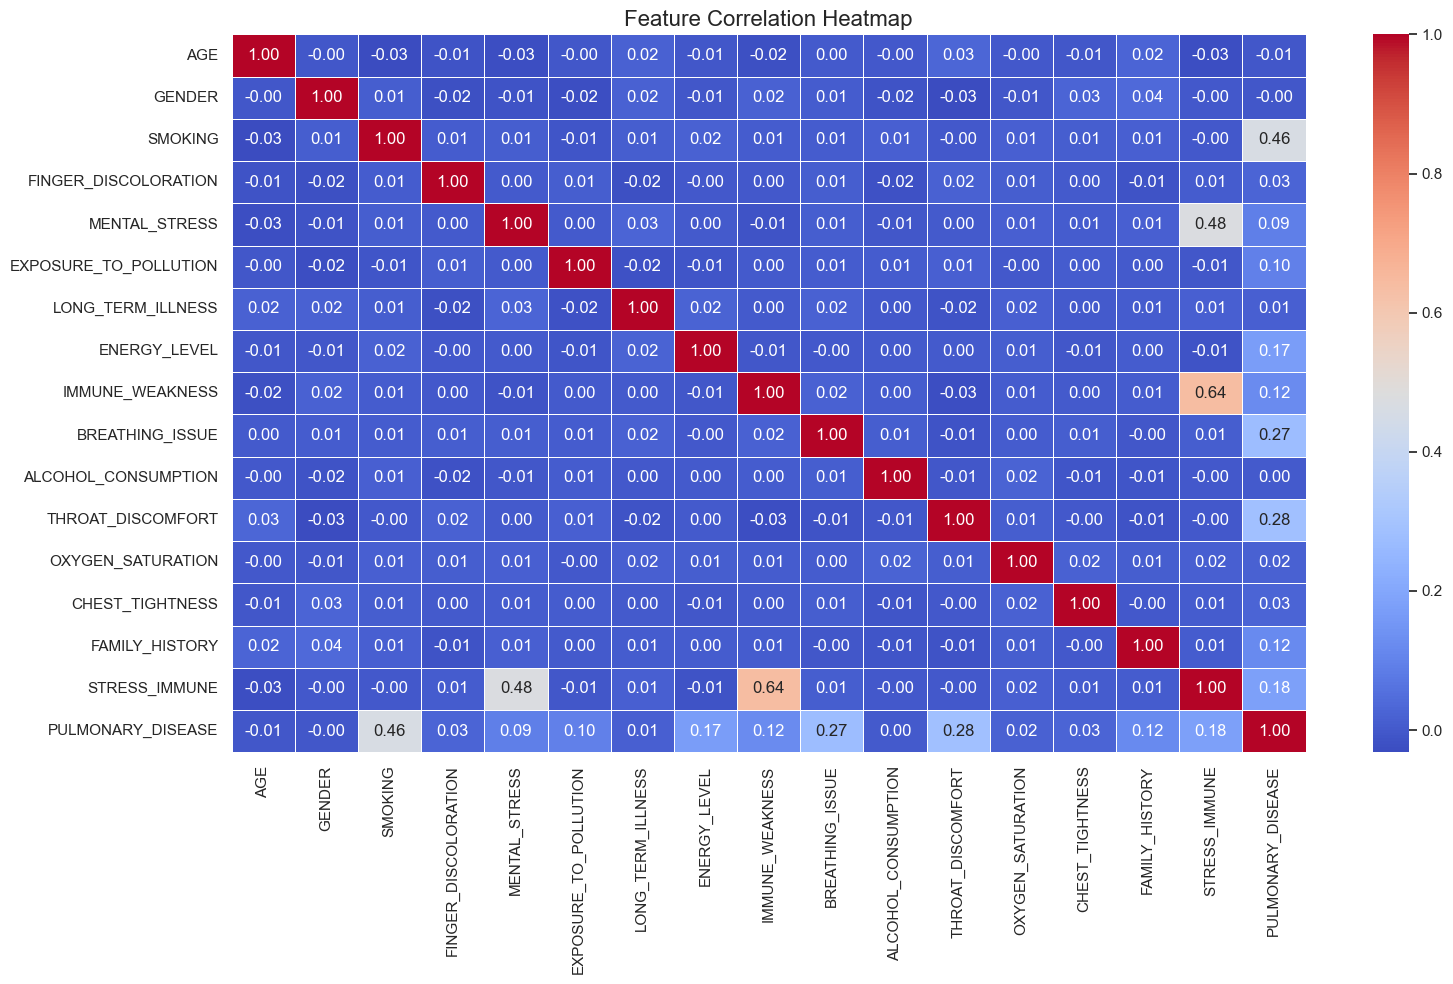

In [19]:
# Generate feature correlation heatmap 
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

# Model Training

## K-Nearest Neighbors (Non-Hypertune)

In [20]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions
y_train_pred_knn = knn_model.predict(X_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Model")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Model
Training Accuracy: 0.913
Test Accuracy: 0.832
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       593
           1       0.79      0.80      0.79       407

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



[[507  86]
 [ 82 325]]


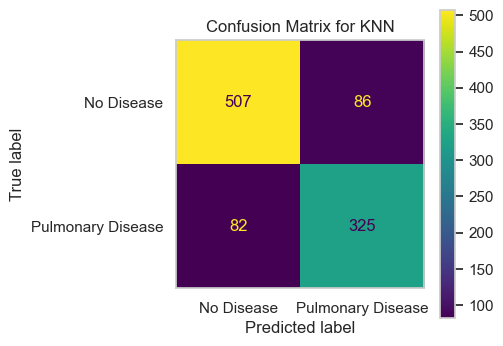

In [21]:
# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Display confusion matrix with class labels
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Disease', 'Pulmonary Disease'])

# Plot the matrix
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix for KNN')
ax.grid(False)
disp_knn.plot(ax=ax)
plt.show()


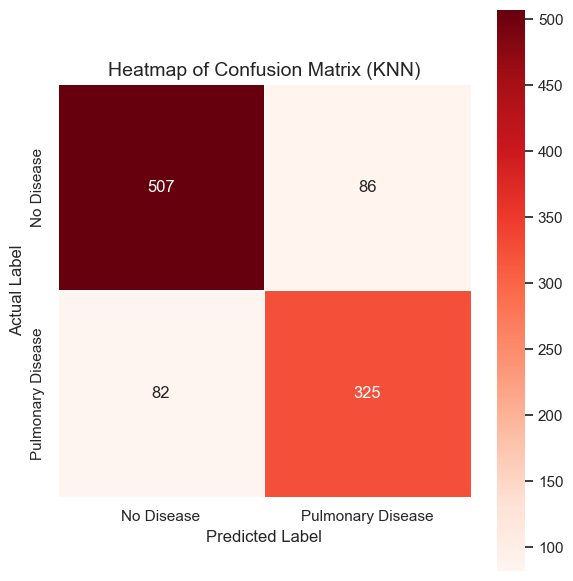

In [22]:
# Plot heatmap for KNN
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', linewidths=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Pulmonary Disease'],
            yticklabels=['No Disease', 'Pulmonary Disease'])

plt.title('Heatmap of Confusion Matrix (KNN)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

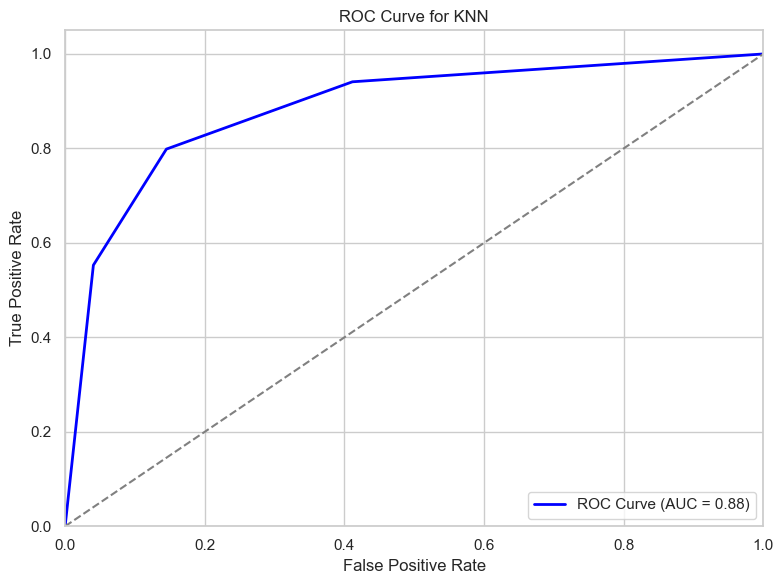

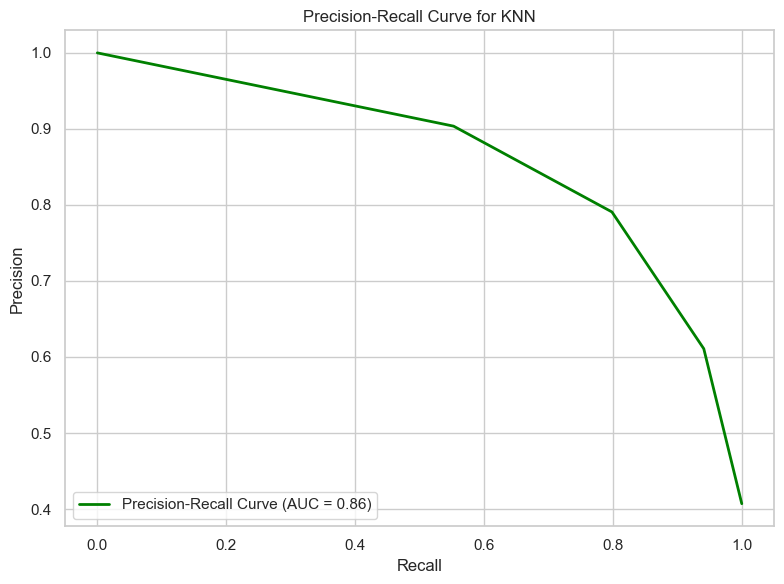

In [23]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Get predicted probabilities for class 1 (Pulmonary Disease)
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]

#  ROC Curve 
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,
         label='ROC Curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Precision-Recall Curve 
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='green', lw=2,
         label='Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc_knn))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


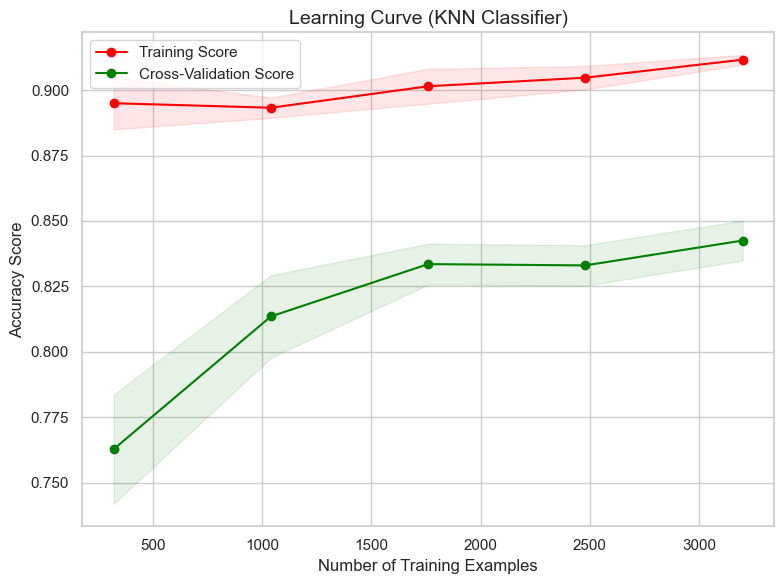

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title, fontsize=14)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Training Examples", fontsize=12)
    plt.ylabel("Accuracy Score", fontsize=12)
    
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Mean and std of scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting
    plt.grid(True)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="red")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
    plt.plot(train_sizes, train_mean, 'o-', color="red", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation Score")
    
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Plot learning curves for KNN
plot_learning_curve(knn_model, "Learning Curve (KNN Classifier)", X_train, y_train, cv=5, n_jobs=-1)


## K Nearest Neighbors (Hypertuning)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Lung Cancer Dataset.csv")
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'NO': 0, 'YES': 1})

# Features and labels
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Improved hyperparameter grid
param_grid = {
    'n_neighbors': [75, 100],     # Try more odd values (higher k = less overfitting)
    'weights': ['uniform'],             # 'distance' helps reduce impact of far points
    'p': [1],                                     # p=1 = Manhattan, p=2 = Euclidean
    'metric': ['minkowski']                          # Required when using p (Minkowski generalizes L1/L2)
}

# Grid Search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Best model
best_knn = grid_knn.best_estimator_

# Predict
y_train_pred_knn = best_knn.predict(X_train)
y_test_pred_knn = best_knn.predict(X_test)

# Report
print("Best Params:", grid_knn.best_params_)
print("Training Accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred_knn)))
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred_knn)))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_knn))

Best Params: {'metric': 'minkowski', 'n_neighbors': 100, 'p': 1, 'weights': 'uniform'}
Training Accuracy: 0.855
Test Accuracy: 0.857

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       571
           1       0.78      0.93      0.85       429

    accuracy                           0.86      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Confusion Matrix - Before Tuning:
[[496  75]
 [ 54 375]]


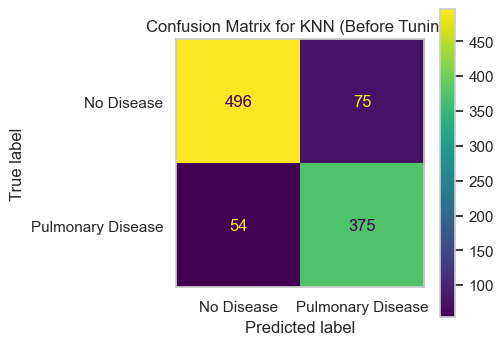

Confusion Matrix - After Tuning:
[[458 113]
 [ 30 399]]


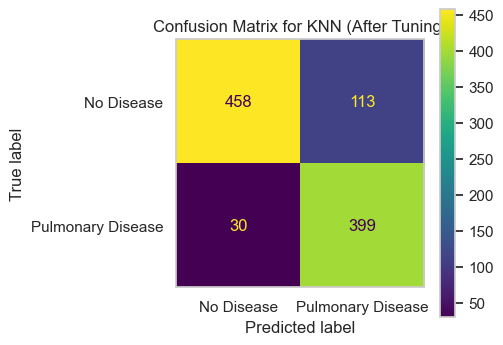

In [26]:
# KNN no tuning
baseline_knn = KNeighborsClassifier()
baseline_knn.fit(X_train, y_train)

# Predictions
y_test_pred_baseline = baseline_knn.predict(X_test)

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)
print("Confusion Matrix - Before Tuning:")
print(cm_baseline)

# Display
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['No Disease', 'Pulmonary Disease'])

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix for KNN (Before Tuning)')
ax.grid(False)
disp_baseline.plot(ax=ax)
plt.show()


#After Tuning
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
print("Confusion Matrix - After Tuning:")
print(cm_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Disease', 'Pulmonary Disease'])

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix for KNN (After Tuning)')
ax.grid(False)
disp_knn.plot(ax=ax)
plt.show()

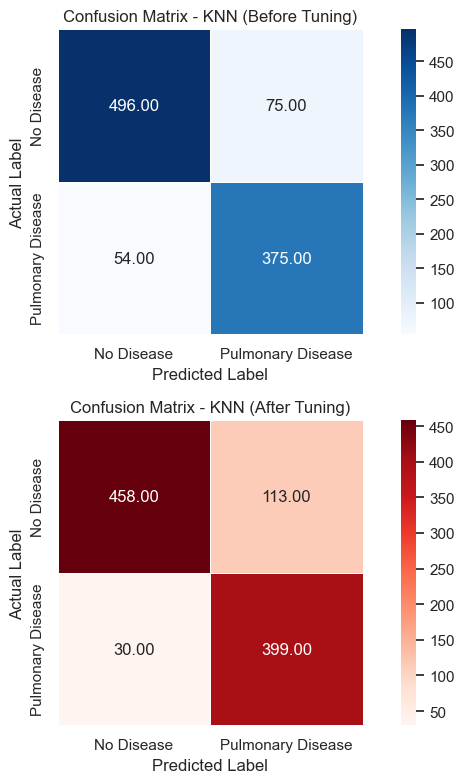

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# --- BEFORE TUNING ---
baseline_knn = KNeighborsClassifier()
baseline_knn.fit(X_train, y_train)
y_test_pred_baseline = baseline_knn.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)

# --- PLOT SIDE-BY-SIDE ---
fig, axes = plt.subplots(2,1, figsize=(8, 8))

# Heatmap - Before Tuning
sns.heatmap(cm_baseline.astype(float), annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Blues',
            xticklabels=['No Disease', 'Pulmonary Disease'],
            yticklabels=['No Disease', 'Pulmonary Disease'],
            ax=axes[0])
axes[0].set_title('Confusion Matrix - KNN (Before Tuning)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

# Heatmap - After Tuning
sns.heatmap(cm_knn.astype(float), annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Pulmonary Disease'],
            yticklabels=['No Disease', 'Pulmonary Disease'],
            ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN (After Tuning)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

plt.tight_layout()
plt.show()

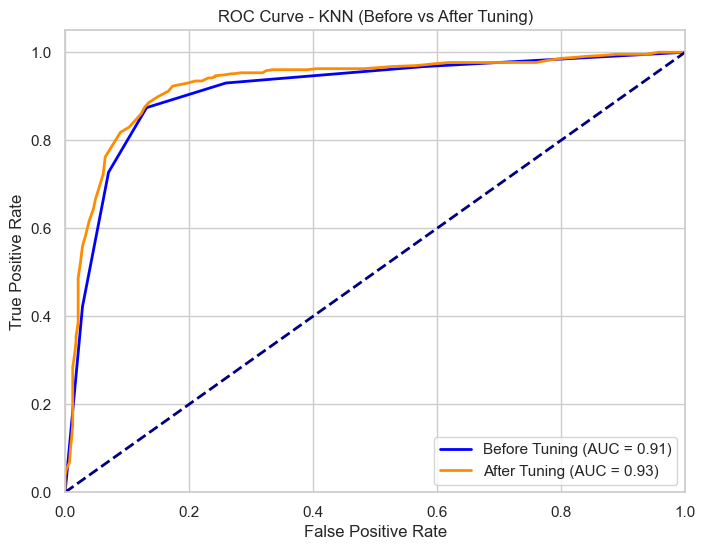

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Before Tune
# Predict probabilities for the positive class (class 1)
y_probs_baseline = baseline_knn.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_probs_baseline)
auc_baseline = auc(fpr_baseline, tpr_baseline)

# After Tune
y_probs_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot Roc curve
plt.figure(figsize=(8, 6))

# Plot Before Tuning
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2,
         label=f'Before Tuning (AUC = {auc_baseline:.2f})')

# Plot After Tuning
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2,
         label=f'After Tuning (AUC = {auc_knn:.2f})')

# Diagonal line (chance)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot styling
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Before vs After Tuning)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

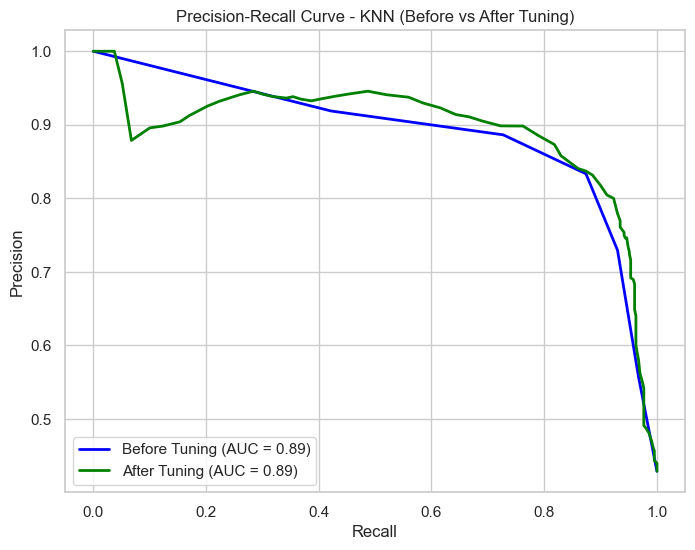

In [29]:
# Before Tune Precision Graph
y_scores_baseline = baseline_knn.predict_proba(X_test)[:, 1]
precision_base, recall_base, _ = precision_recall_curve(y_test, y_scores_baseline)
pr_auc_base = auc(recall_base, precision_base)

# After Tune Precision Graph
y_scores_knn = best_knn.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_scores_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Plot Precision Curve 
plt.figure(figsize=(8, 6))

# Before Tuning
plt.plot(recall_base, precision_base, color='blue', lw=2,
         label='Before Tuning (AUC = {:.2f})'.format(pr_auc_base))

# After Tuning
plt.plot(recall_knn, precision_knn, color='green', lw=2,
         label='After Tuning (AUC = {:.2f})'.format(pr_auc_knn))

# Labels and Title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN (Before vs After Tuning)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



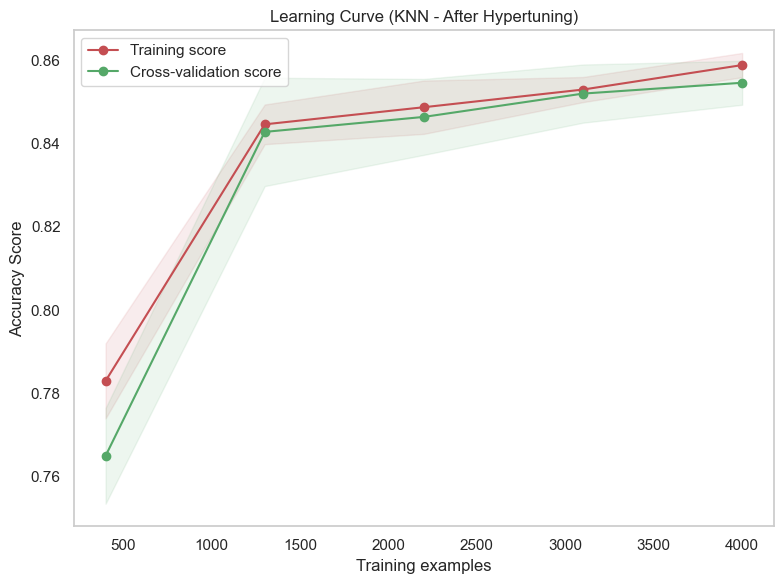

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Shaded error bands
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Mean accuracy lines
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Plot learning curve for KNN (Hypertuned)
plot_learning_curve(
    estimator=best_knn,  # This is your best KNN model after GridSearchCV
    title="Learning Curve (KNN - After Hypertuning)",
    X=X_scaled,
    y=y,
    cv=5,
    n_jobs=-1
)
